# <font color='green'>Решающие деревья



https://scikit-learn.org/stable/modules/tree.html#tree-algorithms


Решающее дерево состоит из вершин, в каждой из которой записан **предикат/правило**: то есть логическое выражение вида $[x_{ij} < t]$.

Процесс обучения дерева:
 - обучающая выборка разбивается на подгруппы согласно тестируемому правилу/предикату
 - на каждом шаге разбиения выборки выбирается наилучший предикат/правило исходя из **критерия информативности**


Запишем задачу формально: мы находимся в узле с множеством объектов $R_m$ и наша цель разбить множество на 2 подмножества: $R_l$ и $R_r$.
Оценивать качество разбиения мы будем следующим образом:
$$H(R_m) - \frac{|R_l|}{|R_m|}H(R_l) - \frac{|R_r|}{|R_m|}H(R_r) \to \max.$$

Нам необходимо найти такую функцию $H(x)$, которая будет оценивать различия и сходства объектов.


Официальная документация - https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation


Функция $H(x)$ зависит от задачи, которую мы решаем

**Классификация**

Обозначим $p_k$ долю объектов класса $k$ во множестве объектов $R$.
1. Энтропия
$$H(R) = -\sum_{k=1}^{K} p_k log(p_k)$$

2. Критерий Джини
$$H(R) = \sum_{k=1}^{K} p_k \cdot (1 - p_k)$$



Что выбрать? Линейные модели или решающие деревья



- Линейная модель --> данные хорошо линейно разделимы
- Решающие деревья --> данные плохо линейно разделимы

In [1]:
# Импорт необходимых библиотек
import numpy as np  # Библиотека для числовых операций
import pandas as pd  # Библиотека для работы с данными

# Импорт набора данных о вине
from sklearn.datasets import load_wine  # Набор данных для классификации

# Импорт моделей машинного обучения
from sklearn.linear_model import LogisticRegression  # Логистическая регрессия для классификации
from sklearn.tree import (
    DecisionTreeClassifier,  # Дерево решений для классификации
    plot_tree,  # Визуализация дерева решений
    export_text  # Экспорт дерева решений в текстовое представление
)
from sklearn.tree import export_graphviz  # Экспорт дерева решений в формате Graphviz

# Импорт библиотеки для визуализации деревьев решений
import graphviz  # Библиотека для отображения графов

# Импорт метрик для оценки качества моделей
from sklearn.metrics import (
    accuracy_score,  # Метрика точности для классификации
    mean_squared_error  # Метрика среднеквадратичной ошибки для регрессии
)

# Импорт функции для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split  # Разделение данных на обучающую и тестовую выборки

# Импорт библиотеки для построения графиков
import matplotlib.pyplot as plt  # Библиотека для построения графиков

# Импорт библиотеки для построения регионов решений
from mlxtend.plotting import plot_decision_regions  # Визуализация регионов решений


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
# фиксируем для вопроизводимости
my_random_state = 12345

In [4]:
# сгенерим данные
np.random.seed(my_random_state)
n = 100
X = np.zeros(shape=(n, 2))
# X

In [5]:
X[:, 0] = np.linspace(-5, 5, n)
# X

In [6]:
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
# X

In [7]:
y = (X[:, 1] > X[:, 0]).astype(int)
y

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

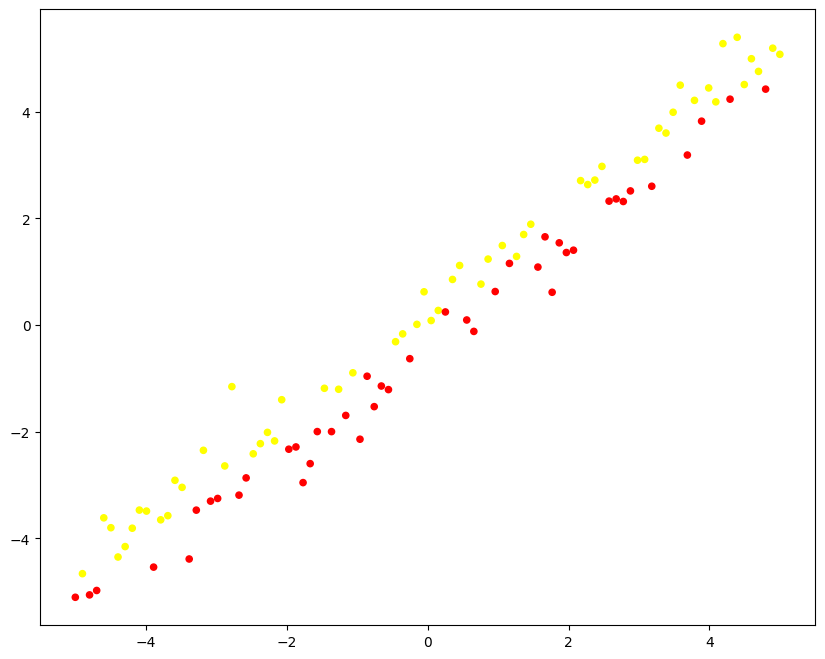

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap="autumn")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=my_random_state)

lr = LogisticRegression(random_state=my_random_state)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Accuracy логистическая регрессии: {round(accuracy_score(y_pred_lr, y_test),2)}")

Accuracy логистическая регрессии: 0.9


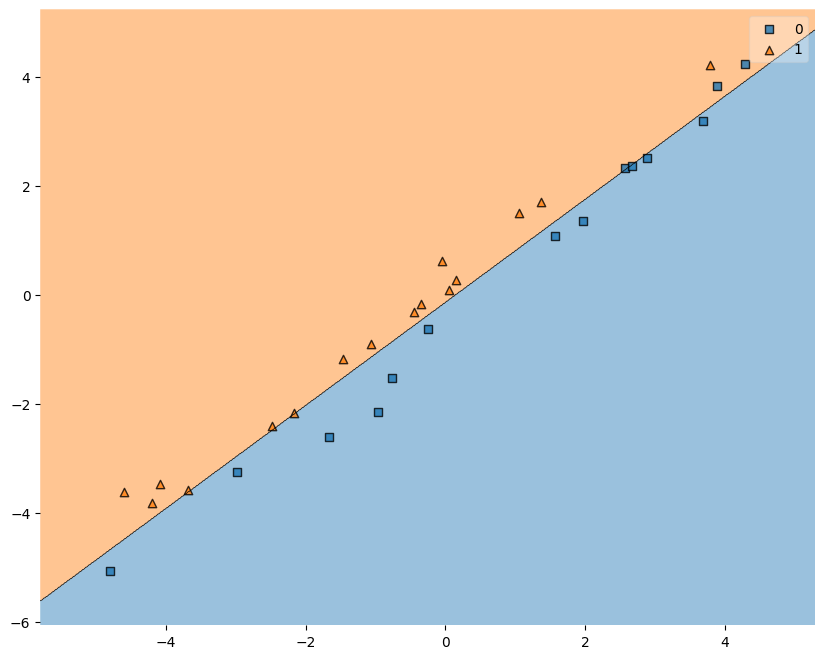

In [10]:
plot_decision_regions(X_test, y_test, lr);

In [11]:
dt = DecisionTreeClassifier(random_state=my_random_state)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

Decision tree accuracy: 0.70


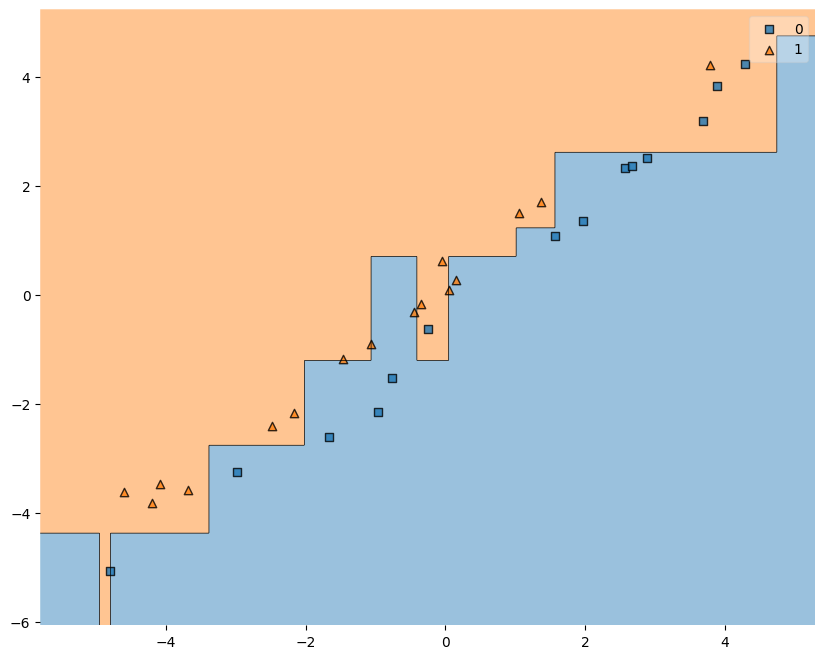

In [12]:
plot_decision_regions(X_test, y_test, dt);

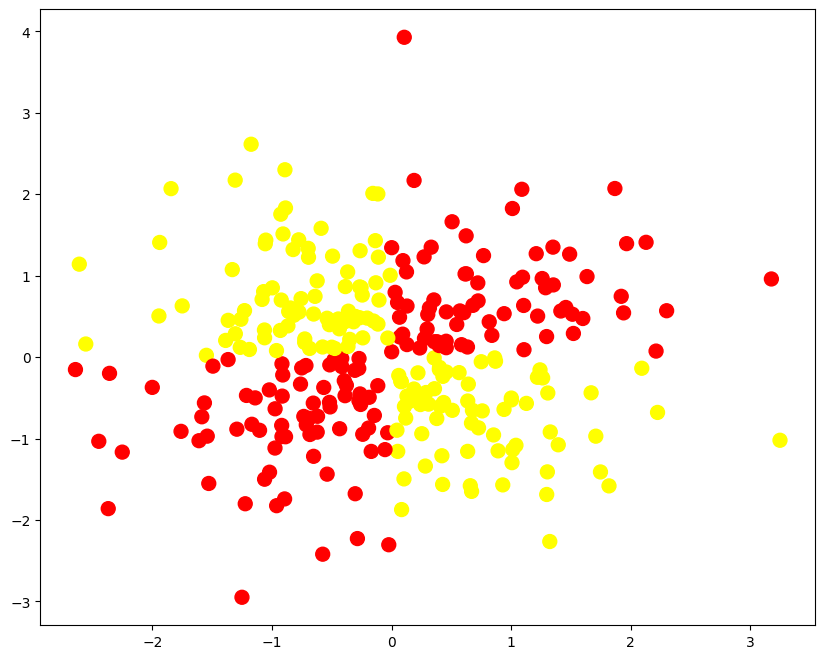

In [13]:
np.random.seed(my_random_state)
n = 300
X = np.random.randn(n, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="autumn");

Accuracy для логистичская регрессии: 0.43


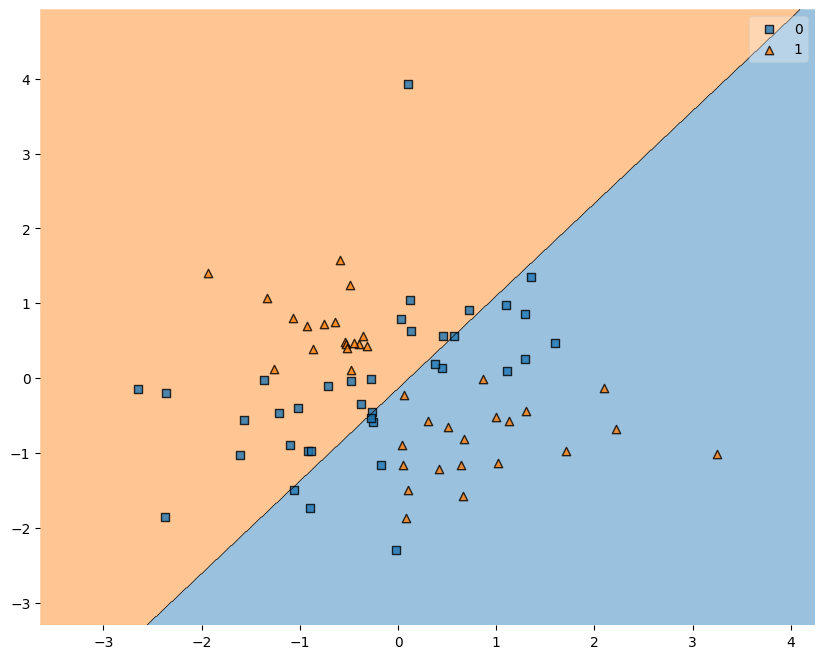

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=my_random_state
)

lr = LogisticRegression(random_state=my_random_state)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Accuracy для логистичская регрессии: {round(accuracy_score(y_pred_lr, y_test),2)}")

plot_decision_regions(X_test, y_test, lr);

Linear model accuracy: 0.96


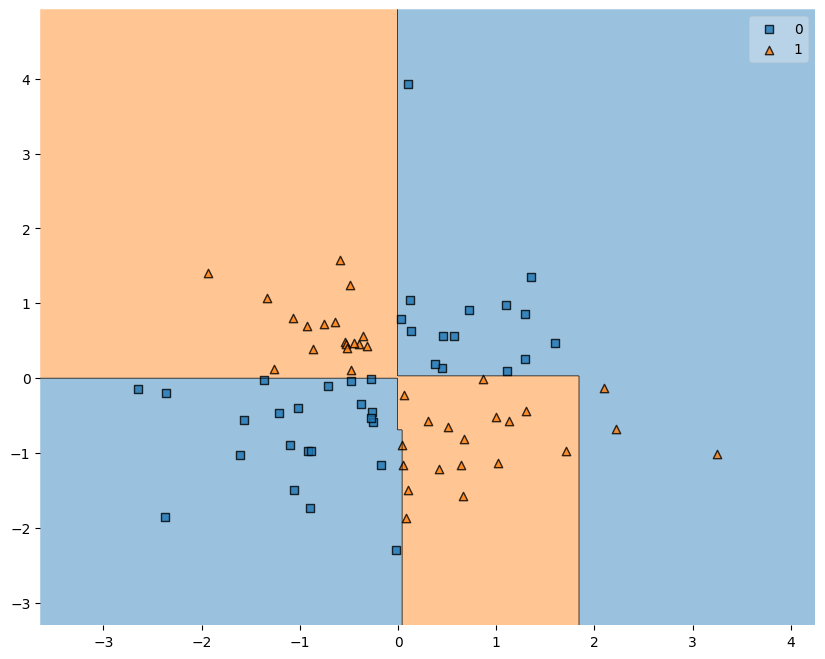

In [15]:
dt = DecisionTreeClassifier(random_state=my_random_state)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt);

# А может ли дерево переобучиться?

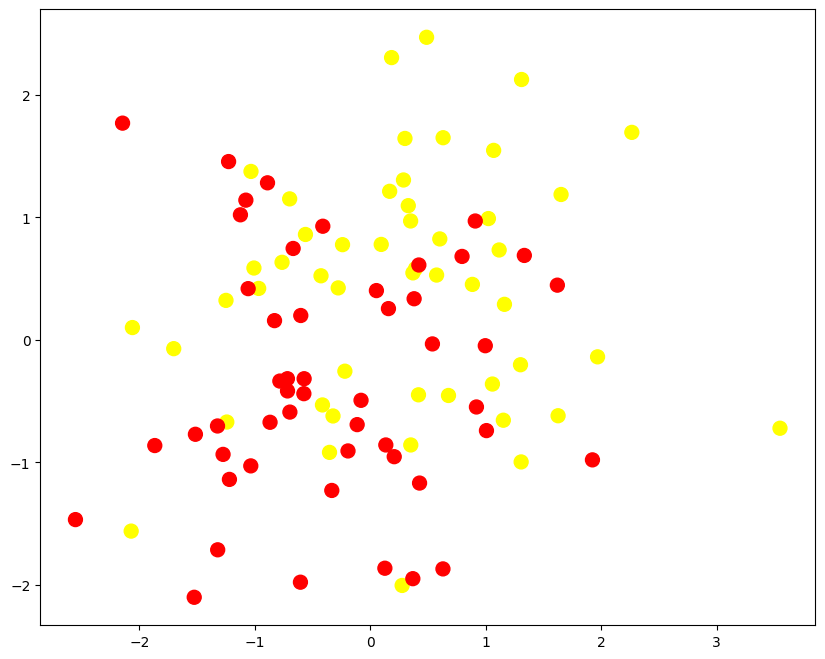

In [16]:
np.random.seed(my_random_state)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.3
X[50:, :] -= 0.3
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="autumn");

In [17]:
# ?DecisionTreeClassifier

Протестируем следующие гиперапараметры:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

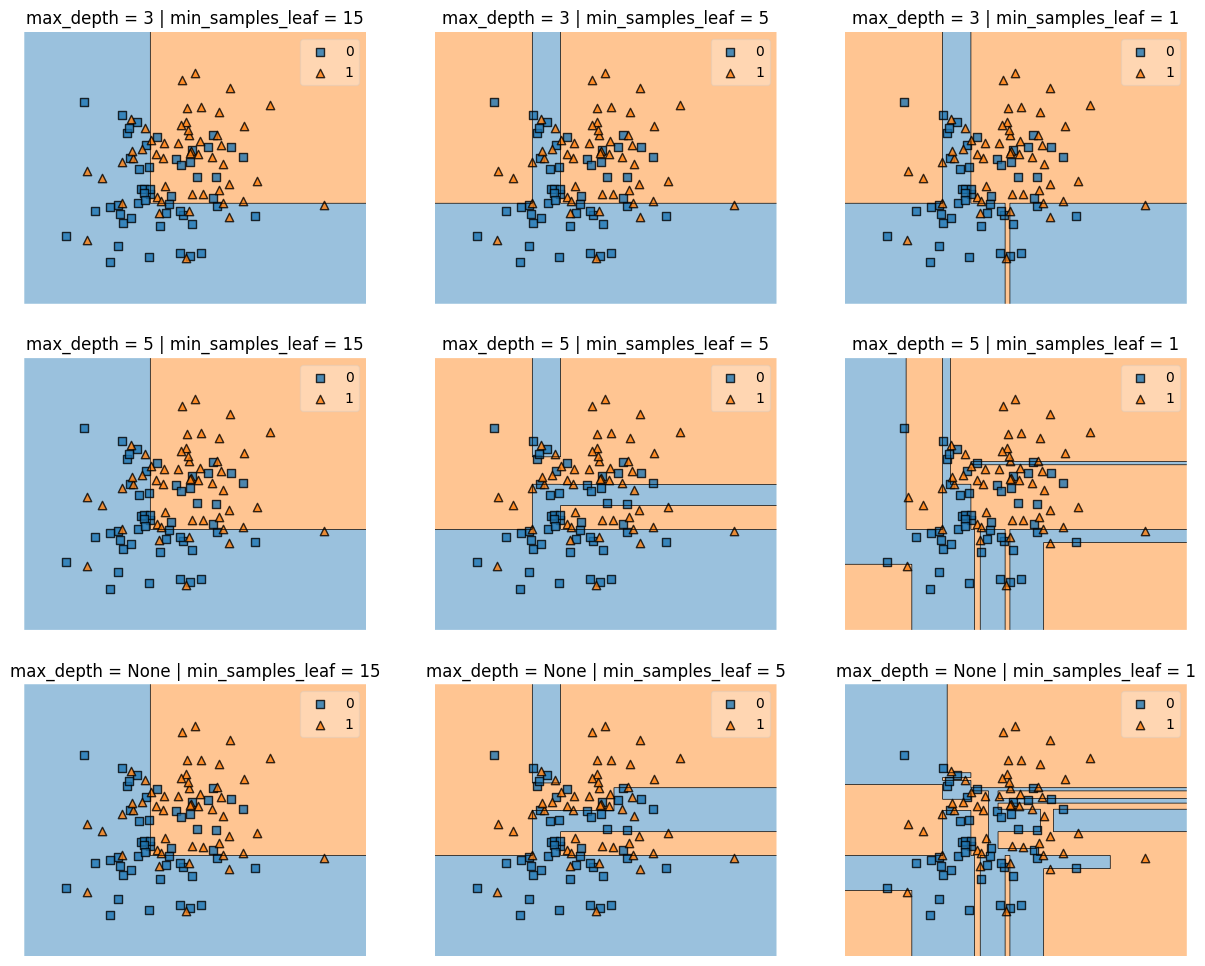

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=my_random_state
        )
        dt.fit(X, y)
        ax[i][j].set_title(
            "max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf)
        )
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

На любой выборке  можно получить нулевую ошибку с помощью максимально переобученного дерева:

Accuracy для дерева решений: 1.0


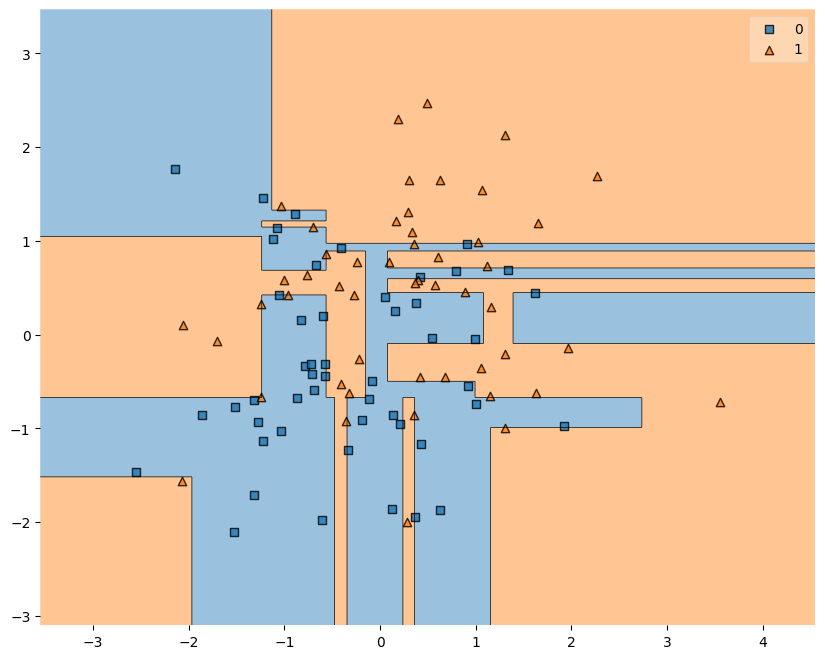

In [19]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=my_random_state)
dt.fit(X, y)

print(f"Accuracy для дерева решений: {round(accuracy_score(y, dt.predict(X)),2)}")

plot_decision_regions(X, y, dt);

Неустойчивость решающих деревьев

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

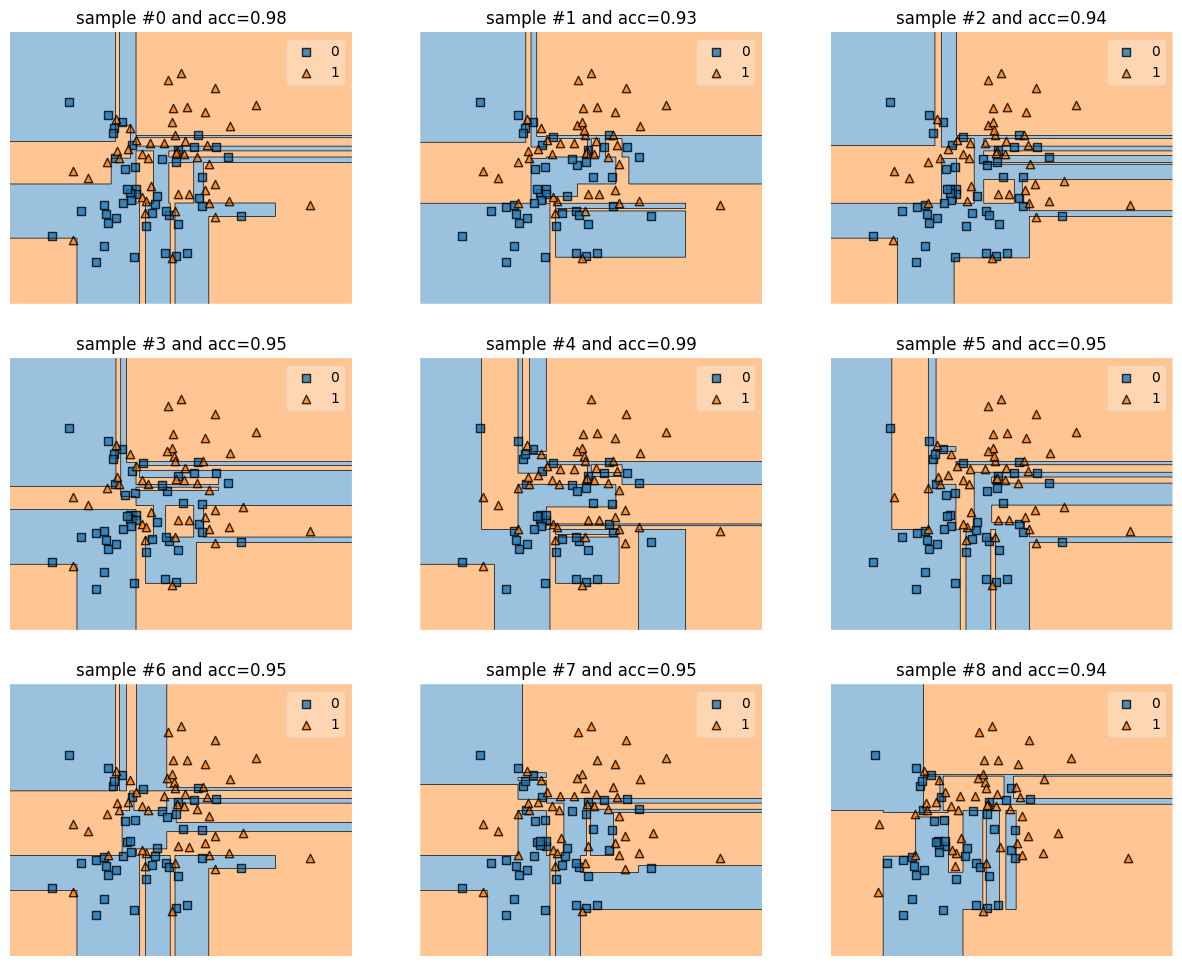

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=my_random_state)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        acc = round(accuracy_score(y, dt.predict(X)),2)
        ax[i][j].set_title(f'sample #{seed_idx} and acc={acc}')
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()